<a href="https://colab.research.google.com/github/books-by-chansung/ds-bookcamp/blob/main/notebooks/ds_bookcamp_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p /usr/share/fonts/truetype/nanum
!wget https://github.com/books-by-chansung/ds-bookcamp/blob/main/NanumBarunGothic.ttf?raw=true -O /usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf

--2024-08-18 14:56:45--  https://github.com/books-by-chansung/ds-bookcamp/blob/main/NanumBarunGothic.ttf?raw=true
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/books-by-chansung/ds-bookcamp/raw/main/NanumBarunGothic.ttf [following]
--2024-08-18 14:56:45--  https://github.com/books-by-chansung/ds-bookcamp/raw/main/NanumBarunGothic.ttf
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/books-by-chansung/ds-bookcamp/main/NanumBarunGothic.ttf [following]
--2024-08-18 14:56:46--  https://raw.githubusercontent.com/books-by-chansung/ds-bookcamp/main/NanumBarunGothic.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.

In [2]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설정

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## 13-1

In [3]:
text1 = 'She sells seashells by the seashore.'
text2 = '"Seashells! The seashells are on sale! By the seashore."'
text3 = 'She sells 3 seashells to John, who lives by the lake.'

## 13-2

In [4]:
words_lists = [text.split() for text in [text1, text2, text3]]
words1, words2, words3 = words_lists

for i, words in enumerate(words_lists, 1):
    print(f"text{i}에 포함된 단어들")
    print(f"{words}\n")

text1에 포함된 단어들
['She', 'sells', 'seashells', 'by', 'the', 'seashore.']

text2에 포함된 단어들
['"Seashells!', 'The', 'seashells', 'are', 'on', 'sale!', 'By', 'the', 'seashore."']

text3에 포함된 단어들
['She', 'sells', '3', 'seashells', 'to', 'John,', 'who', 'lives', 'by', 'the', 'lake.']



## 13-3

In [5]:
def simplify_text(text):
    for punctuation in ['.', ',', '!', '?', '"']:
        text = text.replace(punctuation, '')
    return text.lower()

for i, words in enumerate(words_lists, 1):
    for j, word in enumerate(words):
        words[j] = simplify_text(word)
    print(f"text{i}에 포함된 단어들")
    print(f"{words}\n")

text1에 포함된 단어들
['she', 'sells', 'seashells', 'by', 'the', 'seashore']

text2에 포함된 단어들
['seashells', 'the', 'seashells', 'are', 'on', 'sale', 'by', 'the', 'seashore']

text3에 포함된 단어들
['she', 'sells', '3', 'seashells', 'to', 'john', 'who', 'lives', 'by', 'the', 'lake']



## 13-4

In [6]:
words_sets = [set(words) for words in words_lists]
for i, unique_words in enumerate(words_sets, 1):
    print(f"text{i}에 포함된 단어들")
    print(f"{unique_words}\n")

text1에 포함된 단어들
{'seashells', 'by', 'she', 'the', 'seashore', 'sells'}

text2에 포함된 단어들
{'on', 'seashells', 'sale', 'are', 'by', 'the', 'seashore'}

text3에 포함된 단어들
{'lives', 'seashells', 'who', 'to', 'by', 'she', 'the', 'lake', '3', 'john', 'sells'}



## 13-5

In [7]:
words_set1 = words_sets[0]
for i, words_set in enumerate(words_sets[1:], 2):
    shared_words = words_set1 & words_set
    print(f"text1과 text{i}는 다음 {len(shared_words)}개의 단어를 공유합니다")
    print(f"{shared_words}\n")

text1과 text2는 다음 4개의 단어를 공유합니다
{'by', 'seashells', 'seashore', 'the'}

text1과 text3는 다음 5개의 단어를 공유합니다
{'seashells', 'by', 'she', 'the', 'sells'}



## 13-6

In [8]:
for i, words_set in enumerate(words_sets[1:], 2):
    diverging_words = words_set1 ^ words_set
    print(f"text1과 text{i}에서는 다음 {len(diverging_words)}개의 단어가 겹치지 않습니다.")
    print(f"{diverging_words}\n")

text1과 text2에서는 다음 5개의 단어가 겹치지 않습니다.
{'on', 'sale', 'are', 'she', 'sells'}

text1과 text3에서는 다음 7개의 단어가 겹치지 않습니다.
{'lives', 'who', 'to', 'lake', '3', 'john', 'seashore'}



## 13-7

In [9]:
for i, words_set in enumerate(words_sets[1:], 2):
    total_words = words_set1 | words_set
    print(f"text1과 text{i}는 함께 다음의 {len(total_words)}개의 "
           f"고유 단어로 구성됩니다.\n {total_words}\n")

text1과 text2는 함께 다음의 9개의 고유 단어로 구성됩니다.
 {'on', 'seashells', 'sale', 'are', 'by', 'she', 'the', 'seashore', 'sells'}

text1과 text3는 함께 다음의 12개의 고유 단어로 구성됩니다.
 {'lives', 'who', 'to', 'she', 'the', 'lake', '3', 'john', 'sells', 'seashells', 'by', 'seashore'}



## 13-8

In [11]:
for i, words_set in enumerate(words_sets[1:], 2):
    shared_words = words_set1 & words_set
    diverging_words = words_set1 ^ words_set
    total_words = words_set1 | words_set
    assert len(total_words) == len(shared_words) + len(diverging_words)
    percent_shared = 100 * len(shared_words) / len(total_words)
    percent_diverging = 100 * len(diverging_words) / len(total_words)

    print(f"text1과 text{i}는 다음 {len(shared_words)}개의 단어를 공유합니다")
    print(f"{shared_words}\n")

    print(f"text1과 text{i}는 다음 {len(total_words)}개의 고유 단어를 공유합니다."
        f"\n그 중 {percent_shared:.2f}%는 겹칩니다."
        f"\n그 중 {percent_diverging:.2f}%는 겹치지 않습니다.\n")

text1과 text2는 다음 4개의 단어를 공유합니다
{'by', 'seashells', 'seashore', 'the'}

text1과 text2는 다음 9개의 고유 단어를 공유합니다.
그 중 44.44%는 겹칩니다.
그 중 55.56%는 겹치지 않습니다.

text1과 text3는 다음 5개의 단어를 공유합니다
{'seashells', 'by', 'she', 'the', 'sells'}

text1과 text3는 다음 12개의 고유 단어를 공유합니다.
그 중 41.67%는 겹칩니다.
그 중 58.33%는 겹치지 않습니다.



## 13-9

In [12]:
def jaccard_similarity(text_a, text_b):
    word_set_a, word_set_b = [set(simplify_text(text).split())
                                       for text in [text_a, text_b]]
    num_shared = len(word_set_a & word_set_b)
    num_total = len(word_set_a | word_set_b)
    return num_shared / num_total

for text in [text2, text3]:
    similarity = jaccard_similarity(text1, text)
    print(f"'{text1}'과 '{text}' 사이의 자카드 유사도는 "
           f"{similarity:.4f} 입니다." "\n")

'She sells seashells by the seashore.'과 '"Seashells! The seashells are on sale! By the seashore."' 사이의 자카드 유사도는 0.4444 입니다.

'She sells seashells by the seashore.'과 'She sells 3 seashells to John, who lives by the lake.' 사이의 자카드 유사도는 0.4167 입니다.



## 13-10

In [13]:
def jaccard_similarity_efficient(text_a, text_b):
    word_set_a, word_set_b = [set(simplify_text(text).split())
                                       for text in [text_a, text_b]]
    num_shared = len(word_set_a & word_set_b)
    num_total = len(word_set_a) + len(word_set_b) - num_shared
    return num_shared / num_total

for text in [text2, text3]:
    similarity = jaccard_similarity_efficient(text1, text)
    assert similarity == jaccard_similarity(text1, text)

## 13-11

In [14]:
words_set1, words_set2, words_set3 = words_sets
total_words = words_set1 | words_set2 | words_set3
vocabulary = {word : i for i, word in enumerate(total_words)}
value_to_word = {value: word for word, value in vocabulary.items()}
print(f"vocabulary에는 {len(vocabulary)}개의 단어가 포함되어 있습니다. "
       f"실제 vocabulary에 담긴 내용은 다음과 같습니다.\n{vocabulary}")

vocabulary에는 15개의 단어가 포함되어 있습니다. 실제 vocabulary에 담긴 내용은 다음과 같습니다.
{'lives': 0, 'who': 1, 'to': 2, 'she': 3, 'the': 4, 'lake': 5, '3': 6, 'john': 7, 'sells': 8, 'on': 9, 'seashells': 10, 'sale': 11, 'are': 12, 'by': 13, 'seashore': 14}


## 13-12

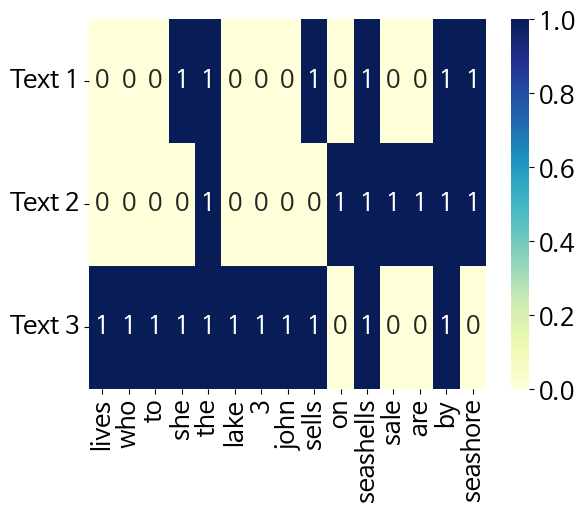

In [15]:
vectors = []
for i, words_set in enumerate(words_sets, 1):
    vector = np.array([0] * len(vocabulary))
    for word in words_set:
        vector[vocabulary[word]] = 1
    vectors.append(vector)

sns.heatmap(vectors, annot=True, cmap='YlGnBu',
                 xticklabels=vocabulary.keys(),
yticklabels=['Text 1', 'Text 2', 'Text 3'])
plt.yticks(rotation=0)
plt.show()

## 13-13

In [16]:
vector1, vector2 = vectors[:2]
for i in range(len(vocabulary)):
    if vector1[i] * vector2[i]:
        shared_word = value_to_word[i]
        print(f"단어 '{shared_word}'는 text1 및 text2에서 모두 등장합니다")

단어 'the'는 text1 및 text2에서 모두 등장합니다
단어 'seashells'는 text1 및 text2에서 모두 등장합니다
단어 'by'는 text1 및 text2에서 모두 등장합니다
단어 'seashore'는 text1 및 text2에서 모두 등장합니다


## 13-14

In [17]:
shared_word_count = sum(vector1[i] * vector2[i]
                                   for i in range(len(vocabulary)))
assert shared_word_count == len(words_set1 & words_set2)

## 13-15

In [18]:
assert vector1.dot(vector2) == shared_word_count
assert vector1 @ vector2 == shared_word_count

## 13-16

In [19]:
assert vector1 @ vector1 == len(words_set1)
assert vector2 @ vector2 == len(words_set2)

## 13-17

In [20]:
def tanimoto_similarity(vector_a, vector_b):
    num_shared = vector_a @ vector_b
    num_total = vector_a @ vector_a + vector_b @ vector_b - num_shared
    return num_shared / num_total

for i, text in enumerate([text2, text3], 1):
    similarity = tanimoto_similarity(vector1, vectors[i])
    assert similarity == jaccard_similarity(text1, text)

## 13-18

In [21]:
non_binary_vector1 = np.array([5, 3])
non_binary_vector2 = np.array([5, 2])
similarity = tanimoto_similarity(non_binary_vector1, non_binary_vector2)
print(f"이진이 아닌 두 벡터의 유사도는 {similarity}입니다")

이진이 아닌 두 벡터의 유사도는 0.96875입니다


## 13-19

In [22]:
similarity = tanimoto_similarity(np.array([61, 2]), np.array([1, 71]))
print(f"텍스트간 유사도는 약 {similarity:.3f}입니다")

텍스트간 유사도는 약 0.024입니다


## 13-20

In [23]:
assert tanimoto_similarity(np.array([1, 1]), np.array([1, 1])) == 1

## 13-21

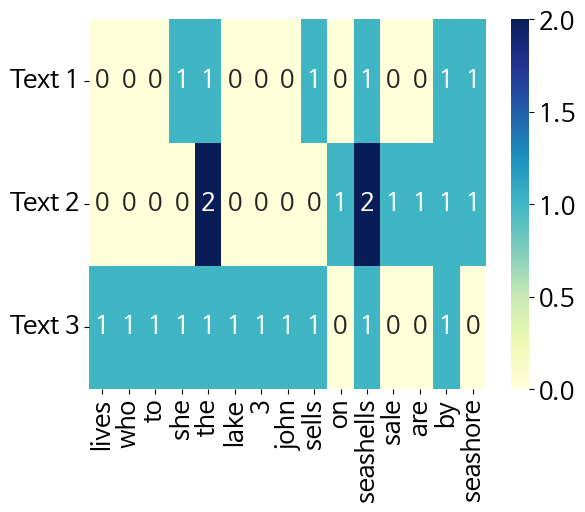

In [24]:
tf_vectors = []
for i, words_list in enumerate(words_lists, 1):
    tf_vector = np.array([0] * len(vocabulary))
    for word in words_list:
        word_index = vocabulary[word]
        tf_vector[word_index] += 1
    tf_vectors.append(tf_vector)

sns.heatmap(tf_vectors, cmap='YlGnBu', annot=True,
                 xticklabels=vocabulary.keys(),
yticklabels=['Text 1', 'Text 2', 'Text 3'])
plt.yticks(rotation=0)
plt.show()

## 13-22

In [25]:
tf_vector1 = tf_vectors[0]
binary_vector1 = vectors[0]

for i, tf_vector in enumerate(tf_vectors[1:], 2):
    similarity = tanimoto_similarity(tf_vector1, tf_vector)
    old_similarity = tanimoto_similarity(binary_vector1, vectors[i - 1])
    print(f"text1과 text{i} 사이에 다시 계산된 타니모토 유사도는 "
           f" {similarity:.4f} 입니다.")
    print(f"이전에 계산되었던 유사도는 {old_similarity:.4f} 였습니다." "\n")

text1과 text2 사이에 다시 계산된 타니모토 유사도는  0.4615 입니다.
이전에 계산되었던 유사도는 0.4444 였습니다.

text1과 text3 사이에 다시 계산된 타니모토 유사도는  0.4167 입니다.
이전에 계산되었던 유사도는 0.4167 였습니다.



## 13-23

In [26]:
query_vector = np.array([1, 1])
title_a_vector = np.array([3, 3])
title_b_vector = np.array([1, 0])

## 13-24

In [27]:
titles = ["A: Pepperoni Pizza! Pepperoni Pizza! Pepperoni Pizza!",
           "B: Pepperoni"]
title_vectors = [title_a_vector, title_b_vector]
similarities = [tanimoto_similarity(query_vector, title_vector)
                  for title_vector in title_vectors]

for index in sorted(range(len(titles)), key=lambda i: similarities[i],
                         reverse=True):
    title = titles[index]
    similarity = similarities[index]
    print(f"제목 '{title}'과 쿼리와의 유사도는 {similarity:.4f} 입니다")

제목 'B: Pepperoni'과 쿼리와의 유사도는 0.5000 입니다
제목 'A: Pepperoni Pizza! Pepperoni Pizza! Pepperoni Pizza!'과 쿼리와의 유사도는 0.4286 입니다


## 13-25

In [28]:
assert np.array_equal(query_vector, title_a_vector / 3)
assert tanimoto_similarity(query_vector, title_a_vector / 3) == 1

## 13-26

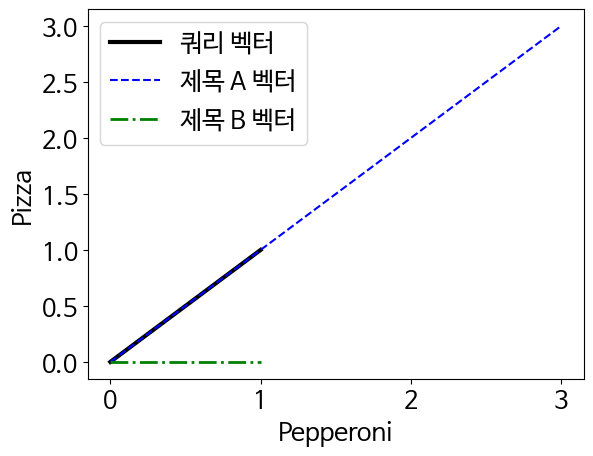

In [30]:
plt.plot([0, query_vector[0]], [0, query_vector[1]], c='k',
          linewidth=3, label='쿼리 벡터')
plt.plot([0, title_a_vector[0]], [0, title_a_vector[1]], c='b',
          linestyle='--', label='제목 A 벡터')
plt.plot([0, title_b_vector[0]], [0, title_b_vector[1]], c='g',
          linewidth=2, linestyle='-.', label='제목 B 벡터')
plt.xlabel('Pepperoni')
plt.ylabel('Pizza')
plt.legend()
plt.show()

## 13-27

In [31]:
from scipy.spatial.distance import euclidean
from numpy.linalg import norm

vector_names = ['Query Vector', 'Title A Vector', 'Title B Vector']
tf_search_vectors = [query_vector, title_a_vector, title_b_vector]
origin = np.array([0, 0])
for name, tf_vector in zip(vector_names, tf_search_vectors):
    magnitude = euclidean(tf_vector, origin)
    assert magnitude == norm(tf_vector)
    assert magnitude == (tf_vector @ tf_vector) ** 0.5
    print(f"{name}의 크기는 약 {magnitude:.4f} 입니다")

magnitude_ratio = norm(title_a_vector) / norm(query_vector)
print(f"\nVector A는 Query Vector 보다 {magnitude_ratio:.0f}x배 큽니다")

Query Vector의 크기는 약 1.4142 입니다
Title A Vector의 크기는 약 4.2426 입니다
Title B Vector의 크기는 약 1.0000 입니다

Vector A는 Query Vector 보다 3x배 큽니다


## 13-28

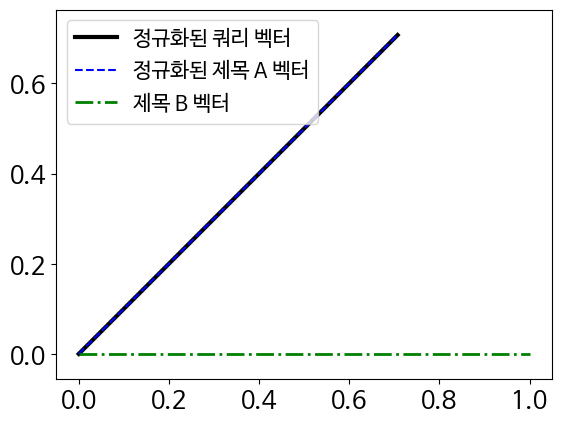

In [36]:
unit_query_vector = query_vector / norm(query_vector)
unit_title_a_vector = title_a_vector / norm(title_a_vector)
assert np.allclose(unit_query_vector, unit_title_a_vector)
unit_title_b_vector = title_b_vector

plt.plot([0, unit_query_vector[0]], [0, unit_query_vector[1]], c='k',
          linewidth=3, label='정규화된 쿼리 벡터')
plt.plot([0, unit_title_a_vector[0]], [0, unit_title_a_vector[1]], c='b',
          linestyle='--', label='정규화된 제목 A 벡터')
plt.plot([0, unit_title_b_vector[0]], [0, unit_title_b_vector[1]], c='g',
          linewidth=2, linestyle='-.', label='제목 B 벡터')
plt.axis('equal')
plt.legend(fontsize='small', loc="upper left")
plt.show()

## 13-29

In [37]:
unit_title_vectors = [unit_title_a_vector, unit_title_b_vector]
similarities = [tanimoto_similarity(unit_query_vector, unit_title_vector)
                  for unit_title_vector in unit_title_vectors]

for index in sorted(range(len(titles)), key=lambda i: similarities[i],
                         reverse=True):
    title = titles[index]
    similarity = similarities[index]
    print(f"'{title}'는 정규화된 쿼리에 대해 {similarity:.4f} 유사도를 가집니다")

'A: Pepperoni Pizza! Pepperoni Pizza! Pepperoni Pizza!'는 정규화된 쿼리에 대해 1.0000 유사도를 가집니다
'B: Pepperoni'는 정규화된 쿼리에 대해 0.5469 유사도를 가집니다


## 13-30

In [38]:
def normalized_tanimoto(u1, u2):
    dot_product = u1 @ u2
    return dot_product / (2 - dot_product)

for unit_title_vector in unit_title_vectors[1:]:
    similarity = normalized_tanimoto(unit_query_vector, unit_title_vector)
    assert similarity == tanimoto_similarity(unit_query_vector, unit_title_vector)

## 13-31

In [39]:
unit_vector_names = ['Normalized Title A vector', 'Title B Vector']
u1 = unit_query_vector

for unit_vector_name, u2 in zip(unit_vector_names, unit_title_vectors):
    similarity = normalized_tanimoto(u1, u2)
    cosine_similarity = 2 * similarity / (1 + similarity)
    assert cosine_similarity == u1 @ u2
    angle = np.arccos(cosine_similarity)
    euclidean_distance = (2 - 2 * cosine_similarity) ** 0.5
    assert round(euclidean_distance, 10) == round(euclidean(u1, u2), 10)
    measurements = {'타니모토 유사도': similarity,
                            '코사인 유사도': cosine_similarity,
                            '유클리드 거리': euclidean_distance,
                            '각도': np.degrees(angle)}

    print("정규화된 쿼리 벡터와 {unit_vector_name}를 비교합니다")
    for measurement_type, value in measurements.items():
        output = f"두 벡터간 {measurement_type}는 {value:.4f}"
        if measurement_type == 'angle':
            output += '도'
        output += ' 입니다'
        print(output)

정규화된 쿼리 벡터와 {unit_vector_name}를 비교합니다
두 벡터간 타니모토 유사도는 1.0000 입니다
두 벡터간 코사인 유사도는 1.0000 입니다
두 벡터간 유클리드 거리는 0.0000 입니다
두 벡터간 각도는 0.0000 입니다
정규화된 쿼리 벡터와 {unit_vector_name}를 비교합니다
두 벡터간 타니모토 유사도는 0.5469 입니다
두 벡터간 코사인 유사도는 0.7071 입니다
두 벡터간 유클리드 거리는 0.7654 입니다
두 벡터간 각도는 45.0000 입니다


## 13-32

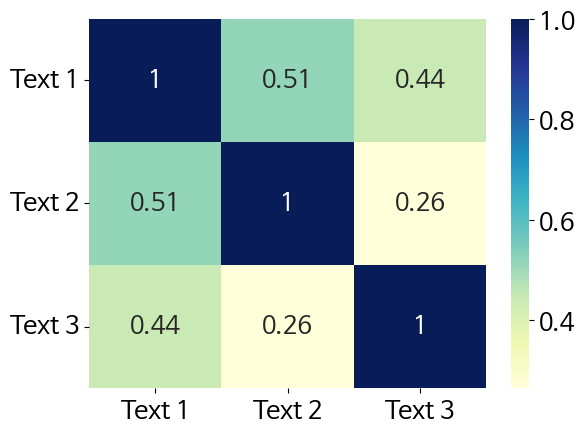

In [40]:
num_texts = len(tf_vectors)
similarities = np.array([[0.0] * num_texts for _ in range(num_texts)])
unit_vectors = np.array([vector / norm(vector) for vector in tf_vectors])
for i, vector_a in enumerate(unit_vectors):
    for j, vector_b in enumerate(unit_vectors):
        similarities[i][j] = normalized_tanimoto(vector_a, vector_b)

labels = ['Text 1', 'Text 2', 'Text 3']
sns.heatmap(similarities, cmap='YlGnBu', annot=True,
                 xticklabels=labels, yticklabels=labels)
plt.yticks(rotation=0)
plt.show()

## 13-33

In [41]:
import pandas as pd

matrices = [unit_vectors, pd.DataFrame(unit_vectors)]
matrix_types = ['2D 넘파이 배열', '판다스 데이터프레임']

for matrix_type, matrix in zip(matrix_types, matrices):
    row_count, column_count = matrix.shape
    print(f"{matrix_type}은 {column_count}행과 {row_count}열로 구성됩니다")
    assert (column_count, row_count) == matrix.T.shape

2D 넘파이 배열은 15행과 3열로 구성됩니다
판다스 데이터프레임은 15행과 3열로 구성됩니다


## 13-34

In [42]:
double_similarities = 2 * similarities
np.array_equal(double_similarities, similarities + similarities)
zero_matrix = similarities - similarities
negative_1_matrix = similarities - similarities - 1

for i in range(similarities.shape[0]):
    for j in range(similarities.shape[1]):
        assert double_similarities[i][j] == 2 * similarities[i][j]
        assert zero_matrix[i][j] == 0
        assert negative_1_matrix[i][j] == -1

## 13-35

In [43]:
squared_similarities = similarities * similarities
assert np.array_equal(squared_similarities, similarities ** 2)
ones_matrix = similarities / similarities

for i in range(similarities.shape[0]):
    for j in range(similarities.shape[1]):
        assert squared_similarities[i][j] == similarities[i][j] ** 2
        assert ones_matrix[i][j] == 1

## 13-36

In [44]:
cosine_similarities = 2 * similarities / (1 + similarities)
for i in range(similarities.shape[0]):
    for j in range(similarities.shape[1]):
        cosine_sim = unit_vectors[i] @ unit_vectors[j]
        assert round(cosine_similarities[i][j], 15) == round(cosine_sim, 15)

## 13-37

In [45]:
for name, matrix in [('Similarities', similarities),
                          ('Unit Vectors', unit_vectors)]:
    print(f"행렬 {name}의 행과 열에 접근합니다.")
    row, column = matrix[0], matrix[:,0]
    print(f"0번 째 행:\n{row}")
    print(f"\n0번째 열:\n{column}\n")

행렬 Similarities의 행과 열에 접근합니다.
0번 째 행:
[1.         0.51442439 0.44452044]

0번째 열:
[1.         0.51442439 0.44452044]

행렬 Unit Vectors의 행과 열에 접근합니다.
0번 째 행:
[0.         0.         0.         0.40824829 0.40824829 0.
 0.         0.         0.40824829 0.         0.40824829 0.
 0.         0.40824829 0.40824829]

0번째 열:
[0.         0.         0.30151134]



## 13-38

In [46]:
row = similarities[0]
column = unit_vectors[:,0]
dot_product = row @ column
print(f"행과 열 사이의 내적: {dot_product:.4f}")

행과 열 사이의 내적: 0.1340


## 13-39

In [47]:
num_rows = similarities.shape[0]
num_columns = unit_vectors.shape[1]
for i in range(num_rows):
    for j in range(num_columns):
        row = similarities[i]
        column = unit_vectors[:,j]
        dot_product = row @ column
        print(f"{i}번째 행과 {j}번째 열의 내적은 {dot_product:.4f}입니다")

0번째 행과 0번째 열의 내적은 0.1340입니다
0번째 행과 1번째 열의 내적은 0.1340입니다
0번째 행과 2번째 열의 내적은 0.1340입니다
0번째 행과 3번째 열의 내적은 0.5423입니다
0번째 행과 4번째 열의 내적은 0.8276입니다
0번째 행과 5번째 열의 내적은 0.1340입니다
0번째 행과 6번째 열의 내적은 0.1340입니다
0번째 행과 7번째 열의 내적은 0.1340입니다
0번째 행과 8번째 열의 내적은 0.5423입니다
0번째 행과 9번째 열의 내적은 0.1427입니다
0번째 행과 10번째 열의 내적은 0.8276입니다
0번째 행과 11번째 열의 내적은 0.1427입니다
0번째 행과 12번째 열의 내적은 0.1427입니다
0번째 행과 13번째 열의 내적은 0.6850입니다
0번째 행과 14번째 열의 내적은 0.5509입니다
1번째 행과 0번째 열의 내적은 0.0797입니다
1번째 행과 1번째 열의 내적은 0.0797입니다
1번째 행과 2번째 열의 내적은 0.0797입니다
1번째 행과 3번째 열의 내적은 0.2897입니다
1번째 행과 4번째 열의 내적은 0.8444입니다
1번째 행과 5번째 열의 내적은 0.0797입니다
1번째 행과 6번째 열의 내적은 0.0797입니다
1번째 행과 7번째 열의 내적은 0.0797입니다
1번째 행과 8번째 열의 내적은 0.2897입니다
1번째 행과 9번째 열의 내적은 0.2774입니다
1번째 행과 10번째 열의 내적은 0.8444입니다
1번째 행과 11번째 열의 내적은 0.2774입니다
1번째 행과 12번째 열의 내적은 0.2774입니다
1번째 행과 13번째 열의 내적은 0.5671입니다
1번째 행과 14번째 열의 내적은 0.4874입니다
2번째 행과 0번째 열의 내적은 0.3015입니다
2번째 행과 1번째 열의 내적은 0.3015입니다
2번째 행과 2번째 열의 내적은 0.3015입니다
2번째 행과 3번째 열의 내적은 0.4830입니다
2번째 행과 4번째 열의 내적은 0.6296입니다
2번째 행과 5번째

## 13-40

In [48]:
dot_products = np.zeros((num_rows, num_columns))
for i in range(num_rows):
    for j in range(num_columns):
        dot_products[i][j] = similarities[i] @ unit_vectors[:,j]

print(dot_products)

[[0.13402795 0.13402795 0.13402795 0.54227624 0.82762755 0.13402795
  0.13402795 0.13402795 0.54227624 0.14267565 0.82762755 0.14267565
  0.14267565 0.6849519  0.55092394]
 [0.07969524 0.07969524 0.07969524 0.28970812 0.84440831 0.07969524
  0.07969524 0.07969524 0.28970812 0.2773501  0.84440831 0.2773501
  0.2773501  0.56705821 0.48736297]
 [0.30151134 0.30151134 0.30151134 0.48298605 0.62960397 0.30151134
  0.30151134 0.30151134 0.48298605 0.07330896 0.62960397 0.07330896
  0.07330896 0.55629501 0.25478367]]


## 13-41

In [49]:
matrix_product = similarities @ unit_vectors
assert np.allclose(matrix_product, dot_products)

## 13-42

In [50]:
try:
    matrix_product = unit_vectors @ similarities
except:
    print("행렬의 곱을 계산할 수 없습니다")

행렬의 곱을 계산할 수 없습니다


## 13-43

In [51]:
matrix_product = np.matmul(similarities, unit_vectors)
assert np.array_equal(matrix_product,
                            similarities @ unit_vectors)

## 13-44

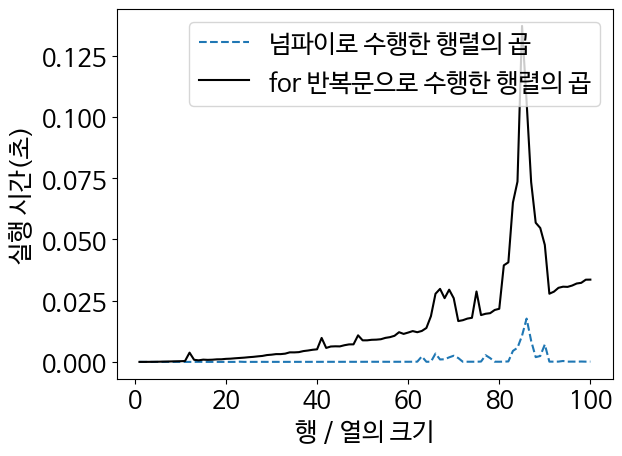

In [53]:
import time
numpy_run_times = []
for_loop_run_times = []
matrix_sizes = range(1, 101)
for size in matrix_sizes:
    matrix = np.ones((size, size))
    start_time = time.time()
    matrix @ matrix
    numpy_run_times.append(time.time() - start_time)

    start_time = time.time()
    for i in range(size):
        for j in range(size):
            matrix[i] @ matrix[:,j]

    for_loop_run_times.append(time.time() - start_time)

plt.plot(matrix_sizes, numpy_run_times,
          label='넘파이로 수행한 행렬의 곱', linestyle='--')
plt.plot(matrix_sizes, for_loop_run_times,
          label='for 반복문으로 수행한 행렬의 곱', color='k')
plt.xlabel('행 / 열의 크기')
plt.ylabel('실행 시간(초)')
plt.legend()
plt.show()

## 13-45

In [55]:
cosine_matrix = unit_vectors @ unit_vectors.T
assert np.allclose(cosine_matrix, cosine_similarities)

## 13-46

In [56]:
tanimoto_matrix = cosine_matrix / (2 - cosine_matrix)
assert np.allclose(tanimoto_matrix, similarities)

## 13-47

In [57]:
output = normalized_tanimoto(unit_vectors, unit_vectors.T)
assert np.array_equal(output, tanimoto_matrix)

## 13-48

In [59]:
vocabulary_size = 50000
normalized_vector = [1 / vocabulary_size] * vocabulary_size
book_count = 30

def measure_run_time(book_count):
    book_matrix = np.array([normalized_vector] * book_count)
    start_time = time.time()
    normalized_tanimoto(book_matrix, book_matrix.T)
    return time.time() - start_time

run_time = measure_run_time(book_count)
print(f"{book_count} x {vocabulary_size} 크기 행렬 전체에 대한 "
       f"유사도를 계산하는 데 {run_time:.4f} 초의 시간이 소요되었습니다")

30 x 50000 크기 행렬 전체에 대한 유사도를 계산하는 데 0.0101 초의 시간이 소요되었습니다


## 13-49

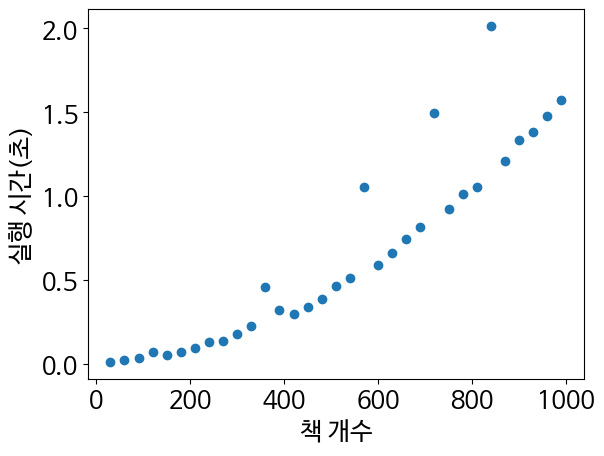

In [60]:
book_counts = range(30, 1000, 30)
run_times = [measure_run_time(book_count)
                 for book_count in book_counts]
plt.scatter(book_counts, run_times)
plt.xlabel('책 개수')
plt.ylabel('실행 시간(초)')
plt.show()

## 13-50

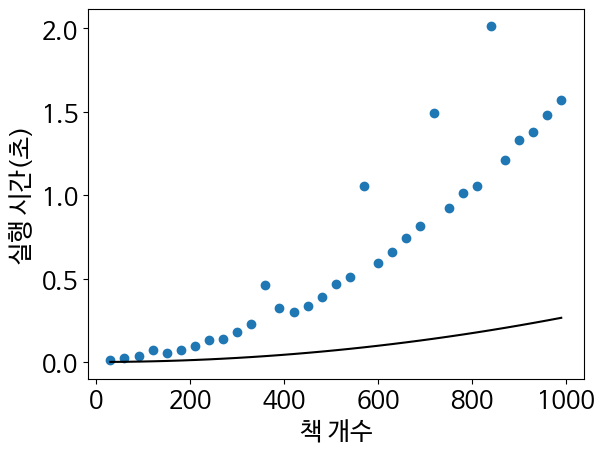

In [61]:
def y(x): return (0.27 / (1000 ** 2)) * (x ** 2)
plt.scatter(book_counts, run_times)
plt.plot(book_counts, y(np.array(book_counts)), c='k')
plt.xlabel('책 개수')
plt.ylabel('실행 시간(초)')
plt.show()

## 13-51

In [63]:
book_count = 300000
run_time = y(book_count) / 3600
print(f"{book_count} x {vocabulary_size} 크기 행렬 전체에 대한 "
       f"유사도를 계산하는 데 {run_time:.4f} 시간이 소요될 것으로 예상됩니다")

300000 x 50000 크기 행렬 전체에 대한 유사도를 계산하는 데 6.7500 시간이 소요될 것으로 예상됩니다
